In [1]:
from nn.modules import Linear, Dropout, ReLU, Softmax, MSELoss, Sigmoid
from nn.autograd import ComputationGraph
from nn.optim import SGD
from nn.data import MnistDataset

import numpy as np
from matplotlib import pyplot as plt

from itertools import islice

In [2]:
train_part = MnistDataset("dataset/mnist_train.csv", batch_size=32)
test_part = MnistDataset("dataset/mnist_test.csv", batch_size=1)
print(len(train_part) * 32, len(test_part))

60000 10000


In [3]:
def calc_test_metrics(model, loader):
    cum_loss = 0
    predictions = []
    targets = []
    for img, target in loader:
        loss, distribution = model(img, target)
        cum_loss += float(loss)
        predictions.append(distribution.argmax(-1)[0])
        targets.append(target.argmax(-1)[0])
    
    predictions = np.array(predictions)
    targets = np.array(targets)
    
    avg_loss = cum_loss / len(loader)
    acc = sum(predictions == targets) / len(targets)
    
    return avg_loss, acc

In [4]:
def plot_metrics(metris):
    train_losses, test_losses, accuracies = zip(*metrics)
    plt.figure(figsize=(17,7))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label="Train Loss")
    plt.plot(test_losses, label="Test Loss")
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(accuracies, label="Accuracy")
    plt.legend()
    plt.show()

In [5]:
def train(model, optimizer, train_part, test_part, epochs=10):
    metrics = []

    for epoch in range(1, epochs + 1):
        avg_loss = 0
        model.train()
        for img, label in train_part:
            model.zero_grad()
            loss, *_ = model(img, label)
            model.backward()
            optimizer.step()

            avg_loss += float(loss)
        avg_loss /= len(train_part)
        model.eval()
        test_loss, acc = calc_test_metrics(model, test_part)
        metrics.append((avg_loss, test_loss, acc))
        print(f"Epoch {epoch}: train loss = {avg_loss:.5f}; test loss = {test_loss:.5f}; acc = {acc:.5f}")
    return metrics

### Linear

Epoch 1: train loss = 0.03109; test loss = 0.01857; acc = 0.89330
Epoch 2: train loss = 0.01796; test loss = 0.01573; acc = 0.90550
Epoch 3: train loss = 0.01602; test loss = 0.01459; acc = 0.90980
Epoch 4: train loss = 0.01503; test loss = 0.01392; acc = 0.91240
Epoch 5: train loss = 0.01440; test loss = 0.01344; acc = 0.91600
Epoch 6: train loss = 0.01394; test loss = 0.01318; acc = 0.91680
Epoch 7: train loss = 0.01360; test loss = 0.01289; acc = 0.91820
Epoch 8: train loss = 0.01330; test loss = 0.01265; acc = 0.92000
Epoch 9: train loss = 0.01307; test loss = 0.01251; acc = 0.92100
Epoch 10: train loss = 0.01287; test loss = 0.01231; acc = 0.92240


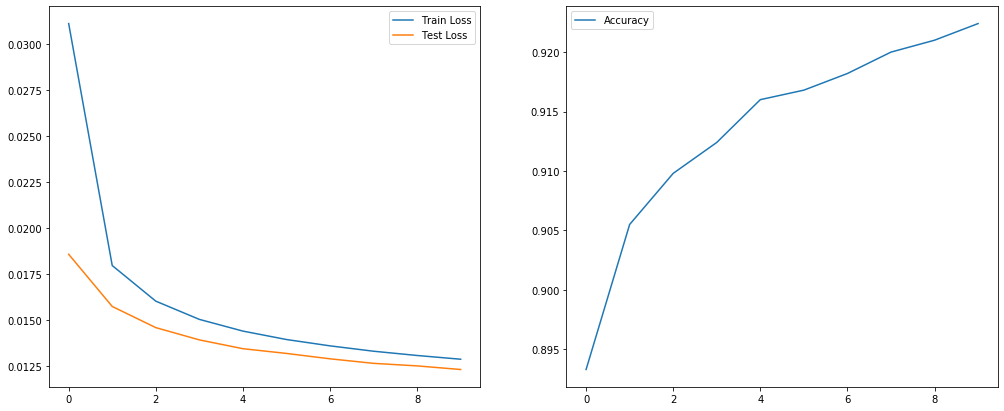

In [6]:
model = ComputationGraph([Linear(784, 10),
                          Softmax(),
                          MSELoss()])
optimizer = SGD(model, lr=1e-3)

metrics = train(model, optimizer, train_part, test_part)
plot_metrics(metrics)

### 2 Linear + Sigmoid

Epoch 1: train loss = 0.07931; test loss = 0.05873; acc = 0.66760
Epoch 2: train loss = 0.04069; test loss = 0.02743; acc = 0.86060
Epoch 3: train loss = 0.02357; test loss = 0.01954; acc = 0.88840
Epoch 4: train loss = 0.01884; test loss = 0.01672; acc = 0.89710
Epoch 5: train loss = 0.01683; test loss = 0.01525; acc = 0.90510
Epoch 6: train loss = 0.01567; test loss = 0.01442; acc = 0.90900
Epoch 7: train loss = 0.01488; test loss = 0.01372; acc = 0.91290
Epoch 8: train loss = 0.01430; test loss = 0.01351; acc = 0.91410
Epoch 9: train loss = 0.01386; test loss = 0.01295; acc = 0.91730
Epoch 10: train loss = 0.01348; test loss = 0.01267; acc = 0.92050


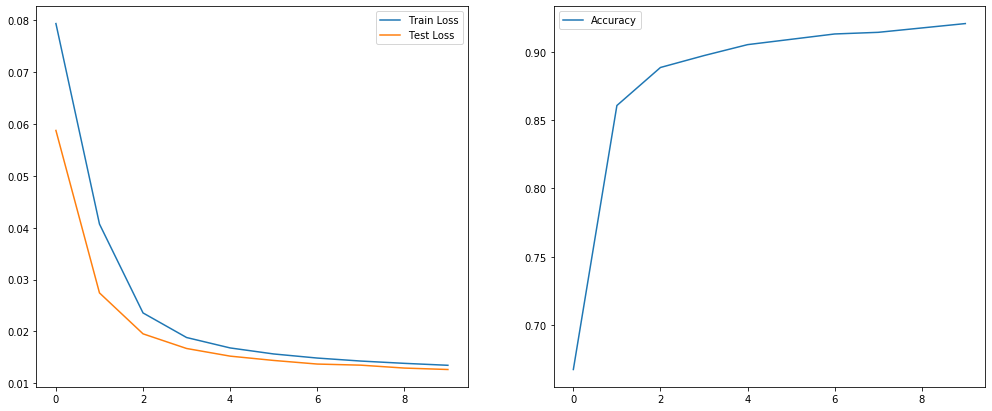

In [7]:
model = ComputationGraph([Linear(784, 300),
                          Sigmoid(),
                          Linear(300, 10),
                          Softmax(),
                          MSELoss()])
optimizer = SGD(model, lr=1e-3)

metrics = train(model, optimizer, train_part, test_part)
plot_metrics(metrics)

### 2 Linear + ReLU

Epoch 1: train loss = 0.03629; test loss = 0.01597; acc = 0.90270
Epoch 2: train loss = 0.01480; test loss = 0.01261; acc = 0.92080
Epoch 3: train loss = 0.01256; test loss = 0.01123; acc = 0.92990
Epoch 4: train loss = 0.01116; test loss = 0.01025; acc = 0.93470
Epoch 5: train loss = 0.01002; test loss = 0.00935; acc = 0.94100
Epoch 6: train loss = 0.00910; test loss = 0.00853; acc = 0.94580
Epoch 7: train loss = 0.00832; test loss = 0.00789; acc = 0.94880
Epoch 8: train loss = 0.00765; test loss = 0.00738; acc = 0.95310
Epoch 9: train loss = 0.00708; test loss = 0.00696; acc = 0.95470
Epoch 10: train loss = 0.00657; test loss = 0.00666; acc = 0.95730


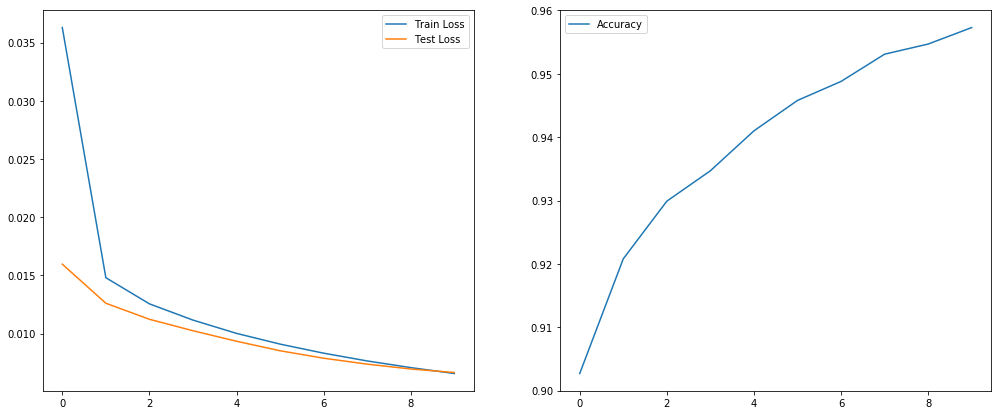

In [8]:
model = ComputationGraph([Linear(784, 300),
                          ReLU(),
                          Linear(300, 10),
                          Softmax(),
                          MSELoss()])
optimizer = SGD(model, lr=1e-3)

metrics = train(model, optimizer, train_part, test_part)
plot_metrics(metrics)

### 2 Linear + ReLU + Dropout

Epoch 1: train loss = 0.02302; test loss = 0.02589; acc = 0.92440
Epoch 2: train loss = 0.01162; test loss = 0.02056; acc = 0.94540
Epoch 3: train loss = 0.00907; test loss = 0.01796; acc = 0.95610
Epoch 4: train loss = 0.00763; test loss = 0.01633; acc = 0.95980
Epoch 5: train loss = 0.00663; test loss = 0.01491; acc = 0.96270
Epoch 6: train loss = 0.00592; test loss = 0.01370; acc = 0.96750
Epoch 7: train loss = 0.00536; test loss = 0.01254; acc = 0.97190
Epoch 8: train loss = 0.00493; test loss = 0.01185; acc = 0.97220
Epoch 9: train loss = 0.00451; test loss = 0.01108; acc = 0.97410
Epoch 10: train loss = 0.00425; test loss = 0.01057; acc = 0.97550


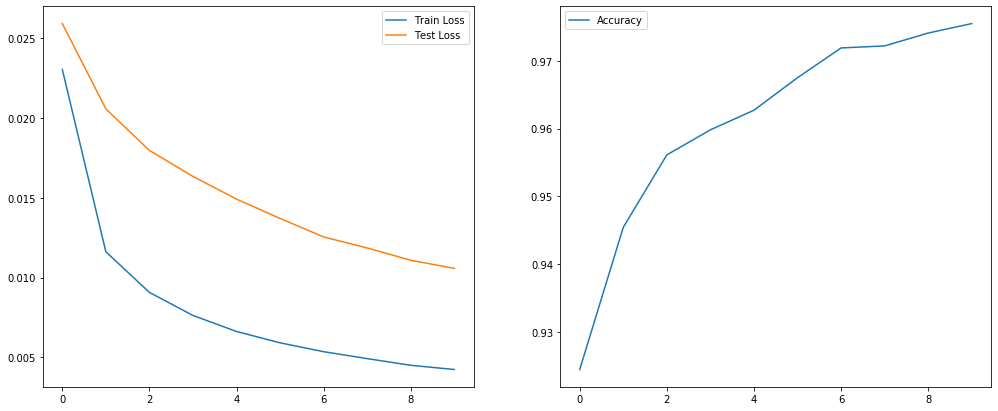

In [9]:
model = ComputationGraph([Linear(784, 300),
                          ReLU(),
                          Dropout(),
                          Linear(300, 10),
                          Softmax(),
                          MSELoss()])
optimizer = SGD(model, lr=1e-3)

metrics = train(model, optimizer, train_part, test_part)
plot_metrics(metrics)

### 3 Linear + ReLU + Dropout

Epoch 1: train loss = 0.02303; test loss = 0.05324; acc = 0.93840
Epoch 2: train loss = 0.01055; test loss = 0.04839; acc = 0.95150
Epoch 3: train loss = 0.00805; test loss = 0.04411; acc = 0.96280
Epoch 4: train loss = 0.00670; test loss = 0.04073; acc = 0.96920
Epoch 5: train loss = 0.00591; test loss = 0.03735; acc = 0.97220
Epoch 6: train loss = 0.00517; test loss = 0.03603; acc = 0.97520
Epoch 7: train loss = 0.00475; test loss = 0.03422; acc = 0.97490
Epoch 8: train loss = 0.00438; test loss = 0.03208; acc = 0.97540
Epoch 9: train loss = 0.00403; test loss = 0.03054; acc = 0.97600
Epoch 10: train loss = 0.00390; test loss = 0.03043; acc = 0.97900


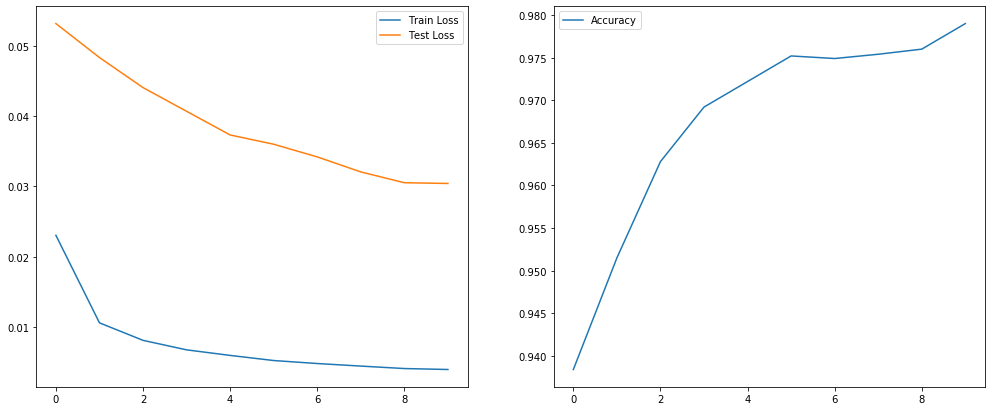

In [10]:
model = ComputationGraph([Linear(784, 300),
                          ReLU(),
                          Dropout(),
                          Linear(300, 100),
                          ReLU(),
                          Dropout(),
                          Linear(100, 10),
                          Softmax(),
                          MSELoss()])
optimizer = SGD(model, lr=1e-3)

metrics = train(model, optimizer, train_part, test_part)
plot_metrics(metrics)

In [11]:
def plot_predictions(data, size=5):
    plt.figure(figsize=(10,10))
    for i, (d, p) in enumerate(data, start=1):
        img = d.reshape(28, 28)
        plt.subplot(size, size, i)
        plt.title(f"Predicted: {p}")
        plt.axis('off')
        plt.imshow(img, cmap="gray")
    plt.show()

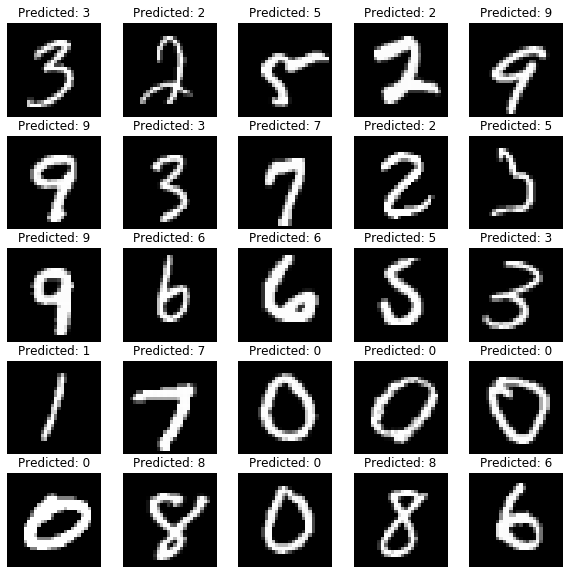

In [12]:
model.eval()

samples = []
for img, label in islice(test_part, 25):
    loss, pred = model(img, label)
    samples.append((img[0], pred.argmax(-1)[0]))
plot_predictions(samples, 5)